In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

source_sentences = ["I am a student.", "He is a teacher.", "She likes books."]
target_sentences = ["Je suis étudiant.", "Il est professeur.", "Elle aime les livres."]

source_sentences = [sentence.lower() for sentence in source_sentences]
target_sentences = [sentence.lower() for sentence in target_sentences]

In [ ]:
source_tokenizer = keras.layers.TextVectorization()
source_tokenizer.adapt(source_sentences)
target_tokenizer = keras.layers.TextVectorization()
target_tokenizer.adapt(target_sentences)

In [ ]:
source_sequences = source_tokenizer(source_sentences)
target_sequences = target_tokenizer(target_sentences)

embedding_dim = 256
units = 1024

In [ ]:
encoder_input = keras.layers.Input(shape=(None,))
encoder_embedding = keras.layers.Embedding(input_dim=len(source_tokenizer.get_vocabulary()), output_dim=embedding_dim)(encoder_input)
encoder_output, forward_h, forward_c = keras.layers.LSTM(units, return_sequences=True, return_state=True)(encoder_embedding)
encoder_states = [forward_h, forward_c]

decoder_input = keras.layers.Input(shape=(None,))
decoder_embedding = keras.layers.Embedding(input_dim=len(target_tokenizer.get_vocabulary()), output_dim=embedding_dim)(decoder_input)
decoder_lstm = keras.layers.LSTM(units, return_sequences=True, return_state=True)
decoder_output, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

In [ ]:
attention = keras.layers.Attention()([decoder_output, encoder_output])
decoder_combined = tf.keras.layers.concatenate([attention, decoder_output])

outputs = keras.layers.Dense(len(target_tokenizer.get_vocabulary()), activation='softmax')(decoder_combined)

In [ ]:
model = keras.models.Model(inputs=[encoder_input, decoder_input], outputs=outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit([source_sequences, target_sequences[:, :-1]], target_sequences[:, 1:], epochs=50, verbose=1)

In [ ]:
train_loss, train_accuracy = model.evaluate([source_sequences, target_sequences[:, :-1]], target_sequences[:, 1:], verbose=0)

print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_accuracy}")

Training Loss: 0.0002752976433839649
Training Accuracy: 1.0


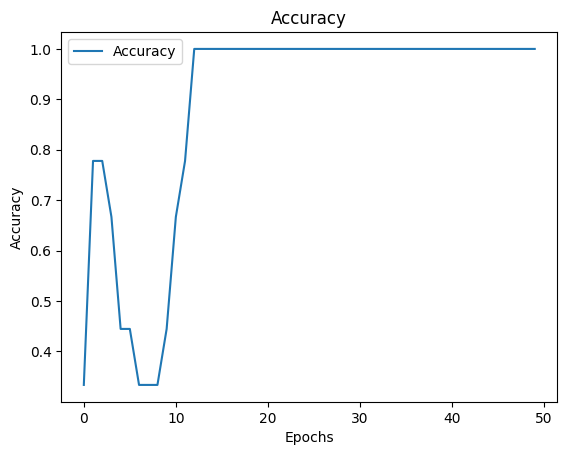

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

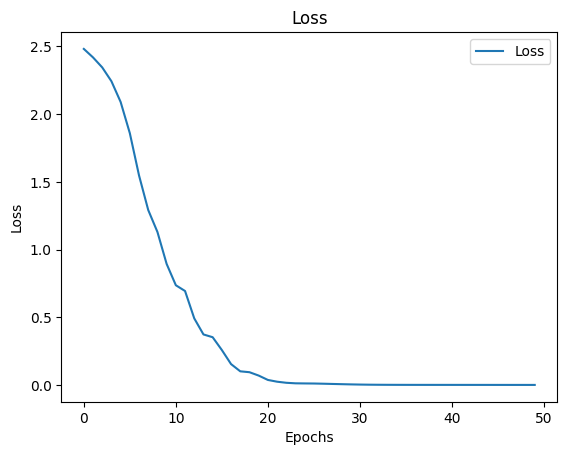

In [ ]:
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()